<a href="https://colab.research.google.com/github/Parth-nXp/pytorch_mini_project/blob/main/rice_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in "./rice-type-classification" (use force=True to force download)


In [67]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchsummary import summary
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [68]:
data_df = pd.read_csv("/content/rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [69]:
data_df.dropna(inplace = True)
data_df.drop(['id'], axis = 1, inplace = True)
print(data_df.shape)

(18185, 11)


In [70]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [71]:
print(data_df["Class"].unique())

[1 0]


In [72]:
print(data_df["Class"].value_counts())

Class
1    9985
0    8200
Name: count, dtype: int64


In [73]:
original_df = data_df.copy()
for column in data_df.columns:
  data_df[column] = data_df[column]/data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [74]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

In [76]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5)

In [77]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [78]:
class dataset(Dataset):
  def __init__(self, X, Y):
    self.X = torch.tensor(X, dtype = torch.float32).to(device)
    self.Y = torch.tensor(Y, dtype = torch.float32).to(device)


  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.Y[index]


In [79]:
training_data = dataset(X_train, y_train)
validation_data = dataset(X_val, y_val)
testing_data = dataset(X_test, y_test)

In [80]:
train_dataloader = DataLoader(training_data, batch_size = 32, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 32, shuffle = False)
testing_dataloader = DataLoader(testing_data, batch_size = 32, shuffle = False)

In [81]:
for x, y in train_dataloader:
  print(x)
  print("=======")
  print(y)
  break

tensor([[0.6313, 0.9308, 0.5945, 0.9906, 0.6003, 0.7946, 0.5900, 0.7192, 0.6693,
         0.8884],
        [0.6152, 0.8303, 0.6554, 0.9667, 0.5858, 0.7843, 0.6281, 0.6778, 0.7343,
         0.7187],
        [0.5687, 0.7939, 0.6341, 0.9651, 0.5456, 0.7541, 0.6383, 0.6531, 0.7312,
         0.7103],
        [0.5331, 0.7910, 0.5863, 0.9750, 0.5055, 0.7301, 0.8950, 0.6370, 0.7205,
         0.7654],
        [0.6323, 0.8385, 0.6603, 0.9671, 0.6048, 0.7952, 0.6491, 0.6835, 0.7422,
         0.7204],
        [0.8723, 0.8565, 0.8877, 0.9147, 0.8350, 0.9340, 0.6644, 0.7526, 0.8446,
         0.5474],
        [0.7311, 0.7833, 0.8079, 0.9159, 0.6899, 0.8551, 0.8850, 0.6729, 0.8856,
         0.5501],
        [0.9626, 0.9151, 0.9117, 0.9243, 0.9170, 0.9811, 0.7205, 0.7842, 0.8585,
         0.5694],
        [0.6938, 0.9336, 0.6548, 0.9814, 0.6613, 0.8330, 0.7567, 0.7447, 0.6861,
         0.8090],
        [0.6842, 0.8854, 0.6750, 0.9714, 0.6500, 0.8272, 0.8616, 0.7117, 0.7408,
         0.7442],
        [0

In [82]:
hidden_neurons = 10
class my_model(nn.Module):
  def __init__(self):
    super(my_model, self).__init__()

    self.input_layer =nn.Linear(X.shape[1], hidden_neurons)
    self.linear = nn.Linear(hidden_neurons, 1)
    self.sigmoid = nn.Sigmoid()

  def forward(self, x):
    x = self.input_layer(x)
    x = self.linear(x)
    x = self.sigmoid(x)
    return x


model = my_model().to(device)

In [83]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [84]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [85]:
total_loss_train_plot = []
total_loss_validation_plot = []

total_acc_train_plot = []
total_acc_validation_plot = []

epochs = 10
for epoch in range(epochs):
  total_acc_train = 0
  total_loss_train = 0
  total_acc_val = 0
  total_loss_val = 0

  for data in train_dataloader:
    inputs, labels = data

    prediction = model(inputs).squeeze(1)

    batch_loss = criterion(prediction, labels)

    total_loss_train += batch_loss.item()

    acc = ((prediction).round() == labels).sum().item()

    total_acc_train += acc

    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()

  with torch.no_grad():
    for data in validation_dataloader:
      inputs, labels = data
      prediction = model(inputs).squeeze(1)
      batch_loss = criterion(prediction, labels)
      total_loss_val += batch_loss.item()
      acc = ((prediction).round() == labels).sum().item()
      total_acc_val += acc
  total_loss_train_plot.append(round(total_loss_train/1000, 4))
  total_loss_validation_plot.append(round(total_loss_val/1000, 4))

  total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
  total_acc_validation_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

  print(f'''Epoch no. {epoch + 1} Train Loss: {round(total_loss_train/1000, 4)} Train Accuracy: {round(total_acc_train/training_data.__len__() * 100, 4)}%
            Validation Loss: {round(total_loss_val/1000, 4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100, 4)}%''')
  print("="*25)


Epoch no. 1 Train Loss: 0.2308 Train Accuracy: 83.2194%
            Validation Loss: 0.0362 Validation Accuracy: 97.7273%
Epoch no. 2 Train Loss: 0.1131 Train Accuracy: 97.8946%
            Validation Loss: 0.0153 Validation Accuracy: 98.607%
Epoch no. 3 Train Loss: 0.055 Train Accuracy: 98.2324%
            Validation Loss: 0.0086 Validation Accuracy: 98.827%
Epoch no. 4 Train Loss: 0.036 Train Accuracy: 98.3502%
            Validation Loss: 0.006 Validation Accuracy: 98.7903%
Epoch no. 5 Train Loss: 0.028 Train Accuracy: 98.3345%
            Validation Loss: 0.005 Validation Accuracy: 98.9003%
Epoch no. 6 Train Loss: 0.0239 Train Accuracy: 98.5388%
            Validation Loss: 0.0043 Validation Accuracy: 98.9003%
Epoch no. 7 Train Loss: 0.0216 Train Accuracy: 98.5466%
            Validation Loss: 0.0038 Validation Accuracy: 98.8636%
Epoch no. 8 Train Loss: 0.0202 Train Accuracy: 98.4916%
            Validation Loss: 0.0035 Validation Accuracy: 98.937%
Epoch no. 9 Train Loss: 0.0192 T

In [86]:
with torch.no_grad():
  total_loss_test = 0
  total_acc_test = 0
  for data in testing_dataloader:
    inputs, labels = data
    prediction = model(inputs).squeeze(1)
    batch_loss_test = criterion(prediction, labels).item()
    total_loss_test += batch_loss_test
    acc_test = ((prediction).round() == labels).sum().item()
    total_acc_test += acc_test

print(f'Test Loss: {round(total_loss_test/1000, 4)} Test Accuracy: {round(total_acc_test/testing_data.__len__() * 100, 4)}%')

Test Loss: 0.0038 Test Accuracy: 98.7537%


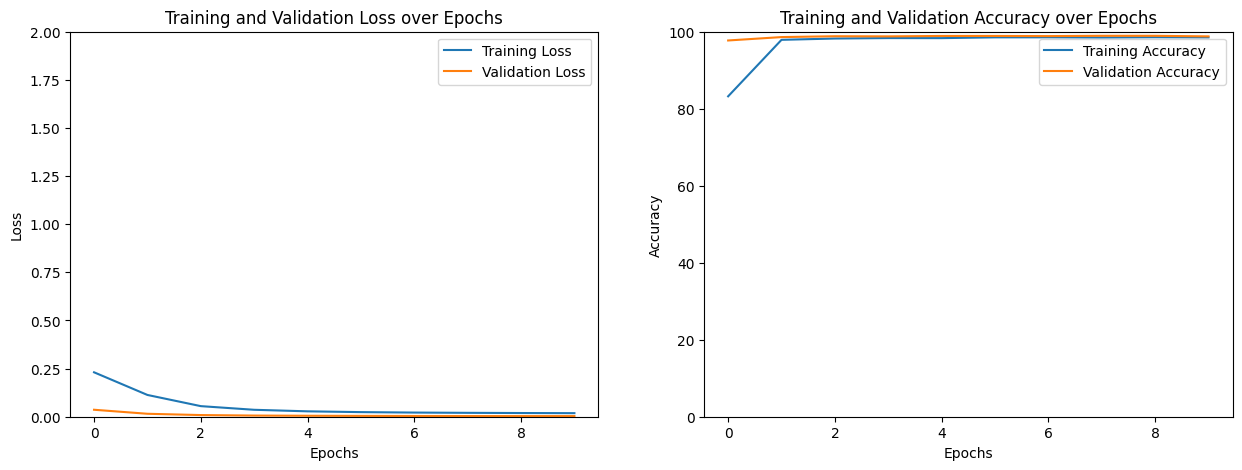

In [87]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))
axs[0].plot(total_loss_train_plot, label = 'Training Loss')
axs[0].plot(total_loss_validation_plot, label = 'Validation Loss')
axs[0].set_title("Training and Validation Loss over Epochs")
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].set_ylim([0,2])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label = 'Training Accuracy')
axs[1].plot(total_acc_validation_plot, label = 'Validation Accuracy')
axs[1].set_title("Training and Validation Accuracy over Epochs")
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].set_ylim([0,100])
axs[1].legend()


plt.show()

In [91]:
area = 2353/original_df['Area'].abs().max()
MajorAxisLength = 81/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = 42/original_df['MinorAxisLength'].abs().max()
Eccentricity = 0.79/original_df['Eccentricity'].abs().max()
ConvexArea = 4096/original_df['ConvexArea'].abs().max()
EquivDiameter = 77/original_df['EquivDiameter'].abs().max()
Extent = 0.69/original_df['Extent'].abs().max()
Perimeter = 299/original_df['Perimeter'].abs().max()
Roundness = 0.79/original_df['Roundness'].abs().max()
AspectRation = 1.5/original_df['AspectRation'].abs().max()

my_prediction = model(torch.tensor([area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation], dtype=torch.float32).to(device))

In [93]:
round(my_prediction.item())

1